# Classificatior Models Created

Here i present several models to the mnist dataset as baseline

1 NN 784 - 128 - 10

2 CNN - TODO

Created by: Tiago Almeida 03/02/2018

In [1]:

##imports
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import utils as ut # auxiliar file to help in data visualization

#tensorflow version when notebook was created - 1.4.0
tf.__version__


'1.4.0'

### Data mnist

Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


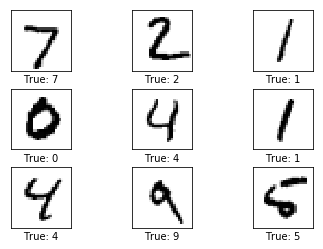

In [2]:
mnist_flat_size = 784

#mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data")

#reset graph using during notebook development
tf.reset_default_graph()

ut.plot_mnist_images_label(mnist.test.images[0:9],mnist.test.labels[0:9])

### NN model

In [3]:
X = tf.placeholder(tf.float32,shape=(None,784),name = "input")
Y = tf.placeholder(tf.float32,shape=(None,10),name = "y")

Classifier_dimentions = [784,128,10]
def classifier(x,name):
    '''
    Classifier network
    
    :param x: tensor with shape (M,784) here M = number of samples
    :return: tensor with shape (M,10) corresponding to the logits
    '''
    with tf.name_scope("classifier_"+name):
        he_init = tf.contrib.layers.variance_scaling_initializer()
        
        d_net = tf.layers.dense(x,Classifier_dimentions[1],
                                    activation=tf.nn.relu,
                                    name='hidden1_'+name,kernel_initializer=he_init)
        for i in range(2,len(Classifier_dimentions)-1):#loop throw hidden layers
            d_net = tf.layers.dense(d_net,Classifier_dimentions[i],
                                    activation=tf.nn.relu,
                                    name='hidden_'+str(i)+name,kernel_initializer=he_init)

        return tf.layers.dense(d_net,Classifier_dimentions[-1],activation=None,name='output_'+name,kernel_initializer=he_init)

clf_nn = classifier(X,"clf_nn")

with tf.name_scope("loss_nn"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=clf_nn)
    loss_nn = tf.reduce_mean(xentropy)

lr = 0.001
with tf.name_scope("train_nn"):
    clf_nn_variables = [var for var in tf.trainable_variables() if 'clf_nn' in var.name] #this line is optional but i want to keep consistence
    train_nn_op = tf.train.AdamOptimizer(lr).minimize(loss_nn,var_list=clf_nn_variables)
    
with tf.name_scope("predict_nn"):
    predict_nn = tf.argmax(clf_nn, 1)
    acc_nn = tf.reduce_mean(tf.cast(tf.equal(predict_nn, tf.argmax(Y, 1)), tf.float32))

### It's trainning time

Epoach: 0 Loss: 2.40687 Acc: 0.1277


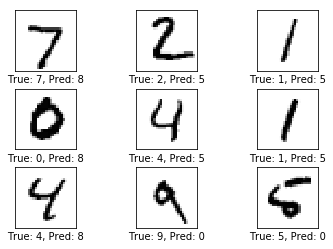

Epoach: 100 Loss: 0.52966 Acc: 0.9072
Epoach: 200 Loss: 0.3736 Acc: 0.9236
Epoach: 300 Loss: 0.305266 Acc: 0.9313
Epoach: 400 Loss: 0.222596 Acc: 0.9357
Epoach: 500 Loss: 0.172933 Acc: 0.9394
Epoach: 600 Loss: 0.179887 Acc: 0.9481
Epoach: 700 Loss: 0.15414 Acc: 0.9489
Epoach: 800 Loss: 0.0639138 Acc: 0.953
Epoach: 900 Loss: 0.0986644 Acc: 0.9521
Epoach: 1000 Loss: 0.173545 Acc: 0.9574


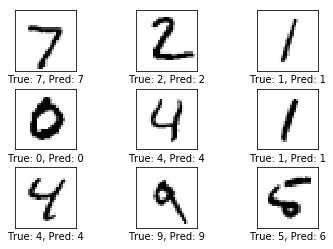

Epoach: 1100 Loss: 0.0814574 Acc: 0.959
Epoach: 1200 Loss: 0.0652287 Acc: 0.9617
Epoach: 1300 Loss: 0.0667395 Acc: 0.9632
Epoach: 1400 Loss: 0.169598 Acc: 0.9635
Epoach: 1500 Loss: 0.0668629 Acc: 0.9646
Epoach: 1600 Loss: 0.163275 Acc: 0.9664
Epoach: 1700 Loss: 0.157057 Acc: 0.9695
Epoach: 1800 Loss: 0.0744504 Acc: 0.9703
Epoach: 1900 Loss: 0.027525 Acc: 0.9698
Epoach: 2000 Loss: 0.047044 Acc: 0.9692


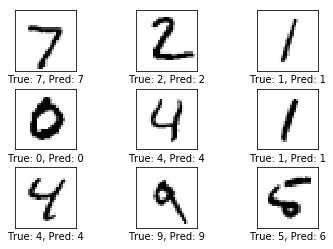

Epoach: 2100 Loss: 0.100449 Acc: 0.9698
Epoach: 2200 Loss: 0.0867078 Acc: 0.9723
Epoach: 2300 Loss: 0.0543456 Acc: 0.9719
Epoach: 2400 Loss: 0.0433033 Acc: 0.9725
Epoach: 2500 Loss: 0.115513 Acc: 0.9743
Epoach: 2600 Loss: 0.0357024 Acc: 0.9724
Epoach: 2700 Loss: 0.0337224 Acc: 0.9723
Epoach: 2800 Loss: 0.0783185 Acc: 0.9737
Epoach: 2900 Loss: 0.0493563 Acc: 0.973
Epoach: 3000 Loss: 0.025448 Acc: 0.9749


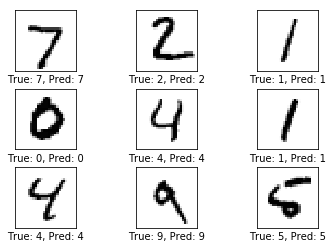

Epoach: 3100 Loss: 0.0379259 Acc: 0.9752
Epoach: 3200 Loss: 0.0486868 Acc: 0.974
Epoach: 3300 Loss: 0.0408309 Acc: 0.9756
Epoach: 3400 Loss: 0.0372097 Acc: 0.9754
Epoach: 3500 Loss: 0.0570218 Acc: 0.9779
Epoach: 3600 Loss: 0.0482292 Acc: 0.9757
Epoach: 3700 Loss: 0.0147986 Acc: 0.9743
Epoach: 3800 Loss: 0.0183473 Acc: 0.976
Epoach: 3900 Loss: 0.0234121 Acc: 0.9759
Epoach: 4000 Loss: 0.0150119 Acc: 0.9777


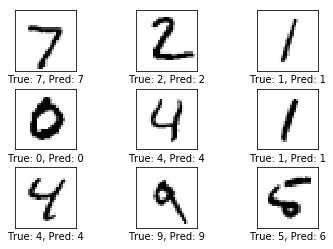

Epoach: 4100 Loss: 0.0363928 Acc: 0.9761
Epoach: 4200 Loss: 0.0354852 Acc: 0.9757
Epoach: 4300 Loss: 0.0109411 Acc: 0.9785
Epoach: 4400 Loss: 0.0370431 Acc: 0.9766
Epoach: 4500 Loss: 0.0100321 Acc: 0.9765
Epoach: 4600 Loss: 0.0396009 Acc: 0.9771
Epoach: 4700 Loss: 0.0216807 Acc: 0.9757
Epoach: 4800 Loss: 0.025606 Acc: 0.9774
Epoach: 4900 Loss: 0.0195172 Acc: 0.9771
Epoach: 5000 Loss: 0.0247721 Acc: 0.9765


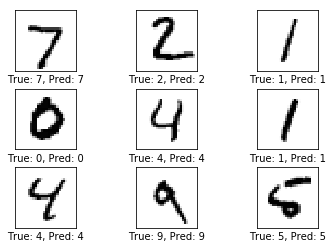

Epoach: 5100 Loss: 0.015357 Acc: 0.9783
Epoach: 5200 Loss: 0.0242646 Acc: 0.9777
Epoach: 5300 Loss: 0.00780459 Acc: 0.9768
Epoach: 5400 Loss: 0.00634244 Acc: 0.9785
Epoach: 5500 Loss: 0.0096394 Acc: 0.9765
Epoach: 5600 Loss: 0.0142904 Acc: 0.979
Epoach: 5700 Loss: 0.00571309 Acc: 0.9788
Epoach: 5800 Loss: 0.0290628 Acc: 0.978
Epoach: 5900 Loss: 0.029483 Acc: 0.9754
Epoach: 6000 Loss: 0.0258601 Acc: 0.9757


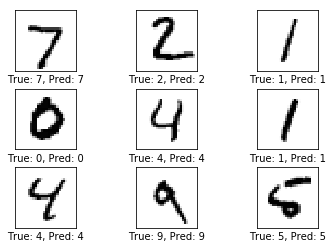

Epoach: 6100 Loss: 0.00760516 Acc: 0.979
Epoach: 6200 Loss: 0.00558118 Acc: 0.9783
Epoach: 6300 Loss: 0.0265651 Acc: 0.9752
Epoach: 6400 Loss: 0.00535151 Acc: 0.9761
Epoach: 6500 Loss: 0.0203338 Acc: 0.9795
Epoach: 6600 Loss: 0.00454087 Acc: 0.9775
Epoach: 6700 Loss: 0.0227408 Acc: 0.9784
Epoach: 6800 Loss: 0.0133353 Acc: 0.9778
Epoach: 6900 Loss: 0.00432326 Acc: 0.9791
Epoach: 7000 Loss: 0.00718018 Acc: 0.9789


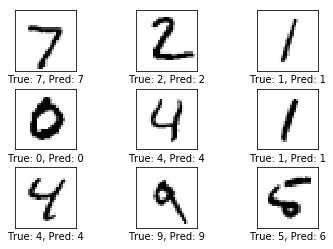

Epoach: 7100 Loss: 0.0117096 Acc: 0.9787
Epoach: 7200 Loss: 0.00802739 Acc: 0.9782
Epoach: 7300 Loss: 0.00685576 Acc: 0.9787
Epoach: 7400 Loss: 0.0161943 Acc: 0.9777
Epoach: 7500 Loss: 0.00323478 Acc: 0.979
Epoach: 7600 Loss: 0.0111919 Acc: 0.9776
Epoach: 7700 Loss: 0.0293787 Acc: 0.9779
Epoach: 7800 Loss: 0.00989953 Acc: 0.9759
Epoach: 7900 Loss: 0.00540623 Acc: 0.9783
Epoach: 8000 Loss: 0.0533862 Acc: 0.9766


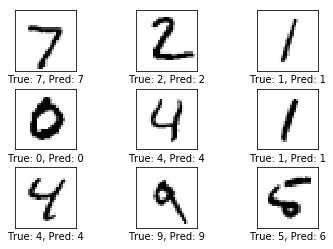

Epoach: 8100 Loss: 0.00175365 Acc: 0.9792
Epoach: 8200 Loss: 0.00431749 Acc: 0.9786
Epoach: 8300 Loss: 0.00522338 Acc: 0.9761
Epoach: 8400 Loss: 0.00204253 Acc: 0.9798
Epoach: 8500 Loss: 0.0231357 Acc: 0.9777
Epoach: 8600 Loss: 0.00419521 Acc: 0.9777
Epoach: 8700 Loss: 0.0190614 Acc: 0.9781
Epoach: 8800 Loss: 0.00234286 Acc: 0.978
Epoach: 8900 Loss: 0.00360725 Acc: 0.9771
Epoach: 9000 Loss: 0.00374977 Acc: 0.9776


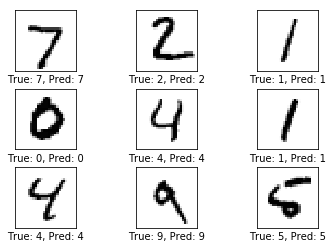

Epoach: 9100 Loss: 0.0101621 Acc: 0.9788
Epoach: 9200 Loss: 0.00551832 Acc: 0.9782
Epoach: 9300 Loss: 0.013474 Acc: 0.9799
Epoach: 9400 Loss: 0.00455606 Acc: 0.9772
Epoach: 9500 Loss: 0.00174064 Acc: 0.9769
Epoach: 9600 Loss: 0.00268363 Acc: 0.9753
Epoach: 9700 Loss: 0.00862373 Acc: 0.979
Epoach: 9800 Loss: 0.00185606 Acc: 0.9794
Epoach: 9900 Loss: 0.000731505 Acc: 0.9785


In [4]:
batch_size = 128
epoach = 10000

#tensorflow session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoach):
    
    x_train,y_train = mnist.train.next_batch(batch_size=batch_size)
    
    _,it_loss = sess.run([train_nn_op,loss_nn], feed_dict = {X:x_train, Y:ut.one_hot(y_train)})
    
    if i%100==0:
        print("Epoach:",i,"Loss:",it_loss,"Acc:",acc_nn.eval(session=sess,feed_dict = {X:mnist.test.images, Y:ut.one_hot(mnist.test.labels)}))
        if i%1000==0:
            labels = predict_nn.eval(session=sess, feed_dict = {X:mnist.test.images[0:9], Y:ut.one_hot(mnist.test.labels[0:9])})
            ut.plot_mnist_images_label(mnist.test.images[0:9],mnist.test.labels[0:9],cls_pred=labels)
        
        
    

In [5]:
sess.close()